In [8]:
import os
from glob import glob
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors

import scanpy as sc
import squidpy as sq
from anndata import AnnData
import pandas as pd
import PIL
from PIL import Image
import numpy as np

import json

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.23.4 scipy==1.11.1 pandas==2.2.2 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.4 pynndescent==0.5.12
squidpy==1.4.1


In [15]:
def extract_neighbor_distances(coordinates, k):
    nbrs = NearestNeighbors(n_neighbors=k+1, p=2).fit(coordinates)
    distances, indices = nbrs.kneighbors(coordinates)
    return distances[:, k]


def process_csv_files(directory, k=10) :
    all_distances = {}
    csv_files = glob(os.path.join(directory,'*.csv'))
    for filepath in csv_files :
        df = pd.read_csv(filepath)
        
        coordinates = df.iloc[:, 0:2]
        coordinates = coordinates.to_numpy()
        coordinates = coordinates[:, [0, 1]]
        
        distances = extract_neighbor_distances(coordinates, k)
        filename = os.path.basename(filepath)
        all_distances[filename] = distances
        
    return all_distances

In [16]:
directory = "/nethome/anastasiya.kazachenk/Projects/Ultivue/Immune_Panel_Cell_Objects_Data/modified"

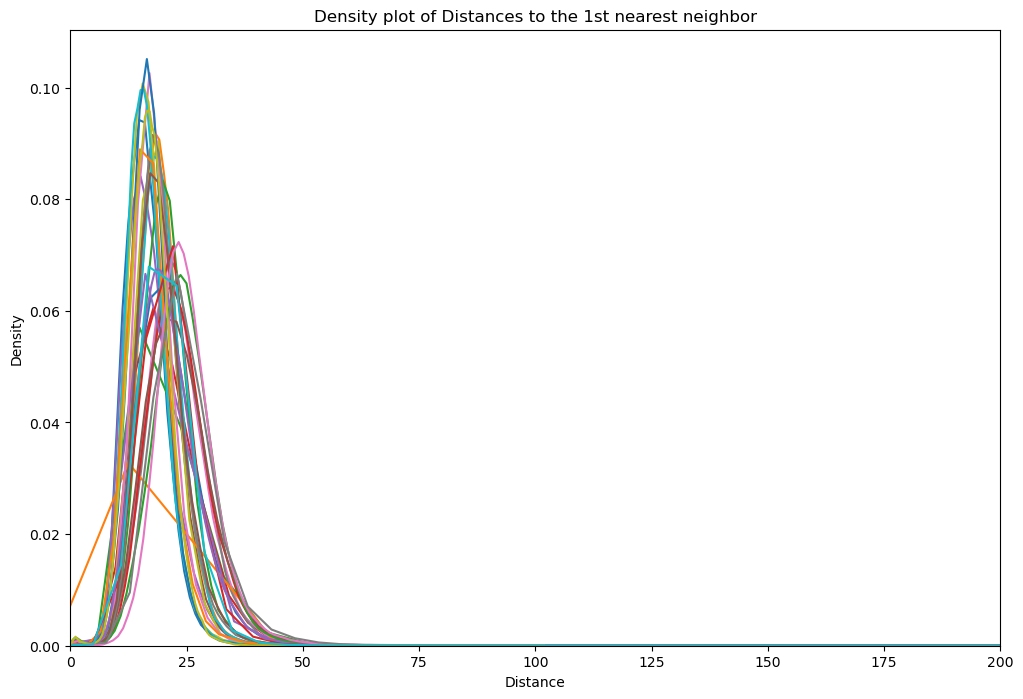

In [22]:
# Proces modified csv files
distances_dict_1stNN = process_csv_files(directory,k=1)

plt.figure(figsize=(12,8))

for filename, distances in distances_dict_1stNN.items():
    sns.kdeplot(distances, label=filename)
    
plt.xlim(0,200)    
plt.title("Density plot of Distances to the 1st nearest neighbor")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

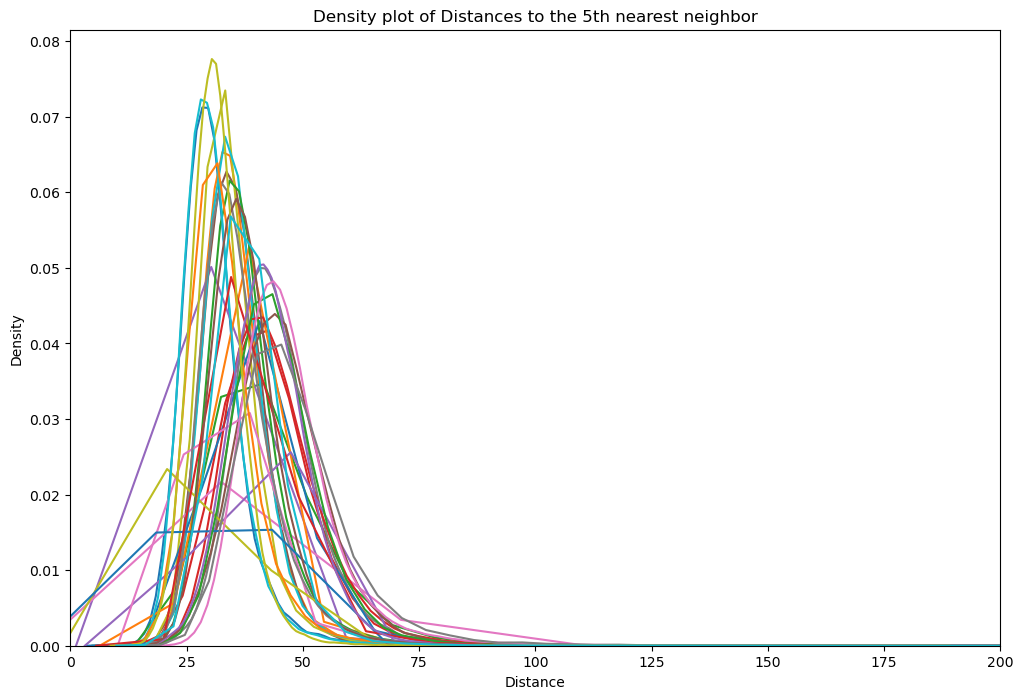

In [23]:
# Proces modified csv files
distances_dict_5thNN = process_csv_files(directory,k=5)

plt.figure(figsize=(12,8))

for filename, distances in distances_dict_5thNN.items():
    sns.kdeplot(distances, label=filename)
    
plt.xlim(0,200)    
plt.title("Density plot of Distances to the 5th nearest neighbor")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

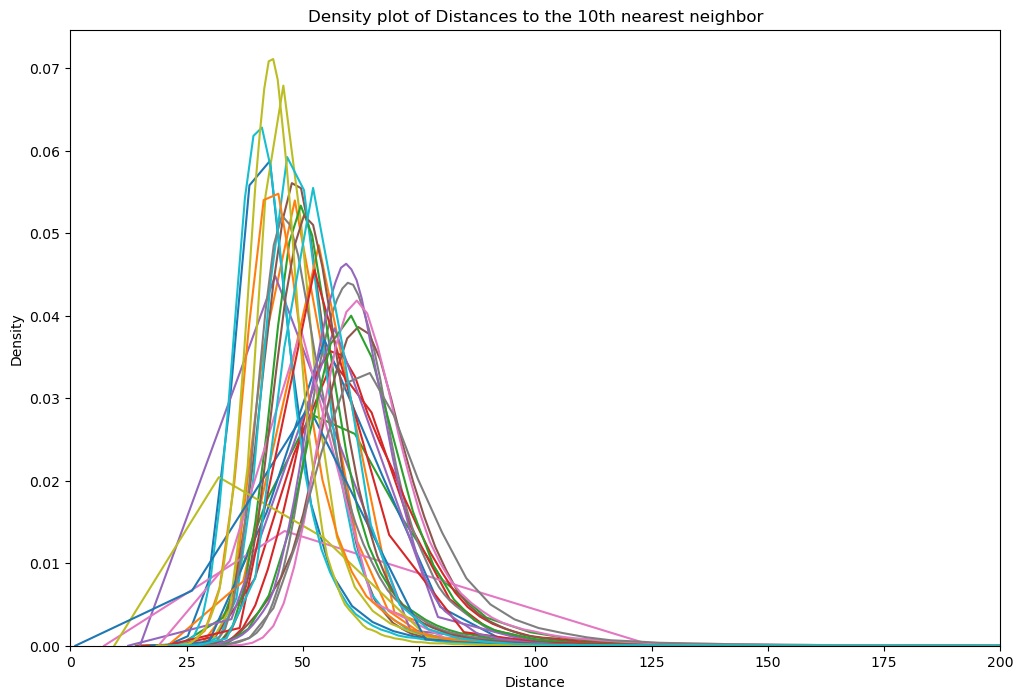

In [24]:
# Proces modified csv files
distances_dict_10thNN = process_csv_files(directory)

plt.figure(figsize=(12,8))

for filename, distances in distances_dict_10thNN.items():
    sns.kdeplot(distances, label=filename)

plt.xlim(0,200)
plt.title("Density plot of Distances to the 10th nearest neighbor")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

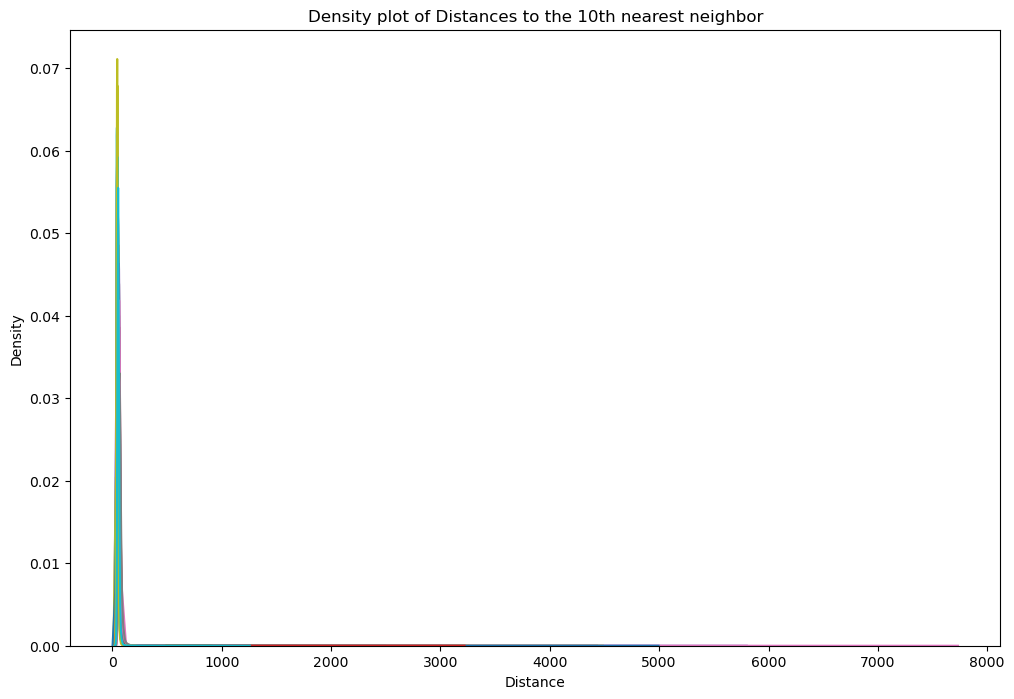

In [25]:
plt.figure(figsize=(12,8))

for filename, distances in distances_dict_10thNN.items():
    sns.kdeplot(distances, label=filename)
        
plt.title("Density plot of Distances to the 10th nearest neighbor")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

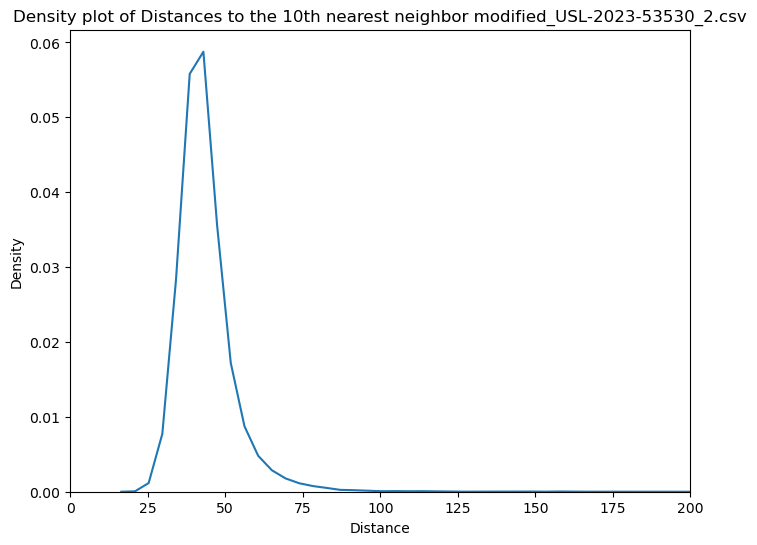

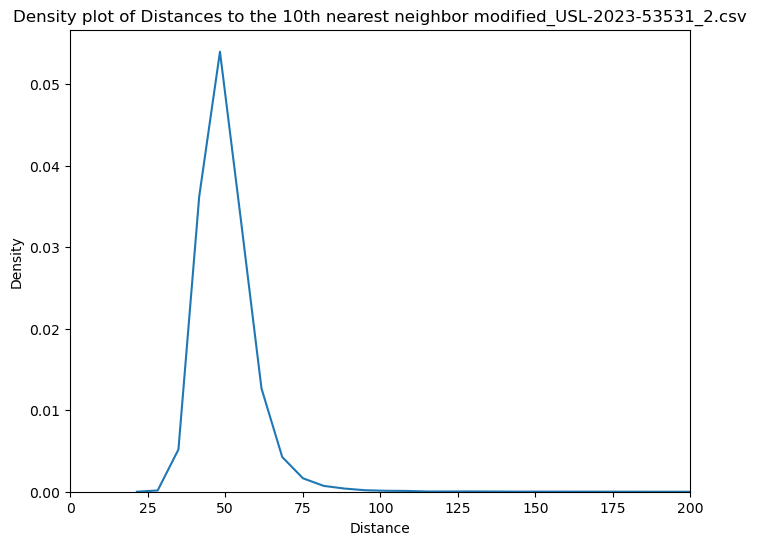

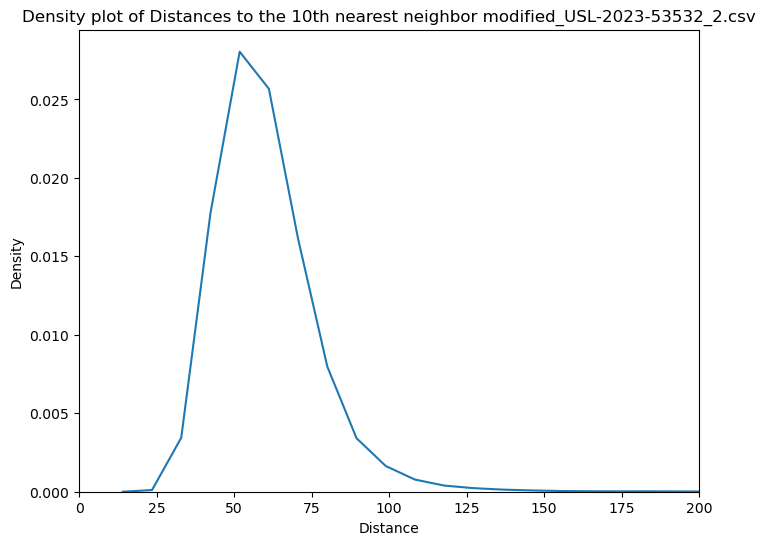

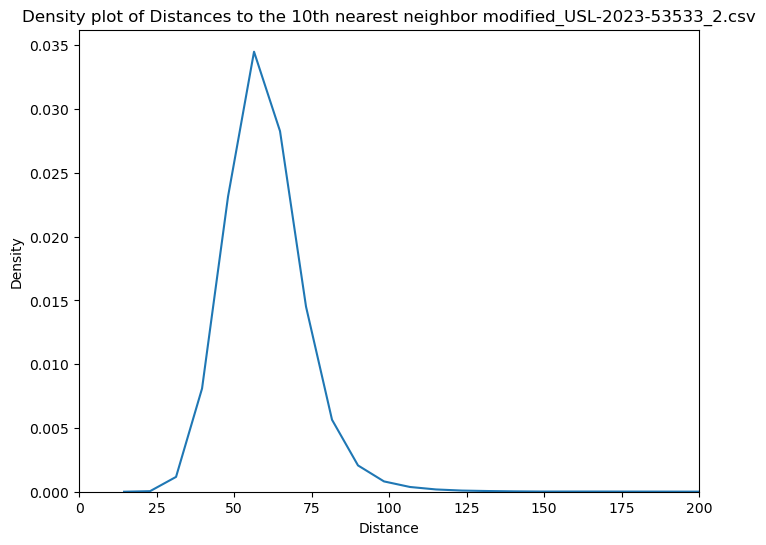

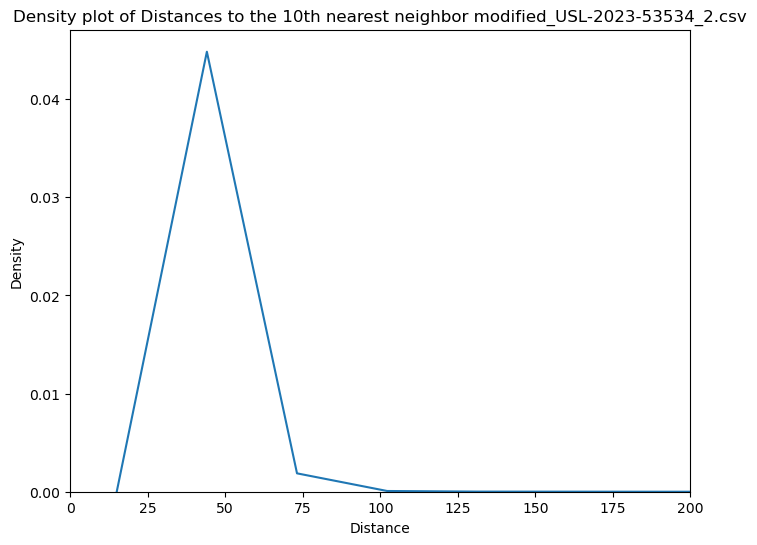

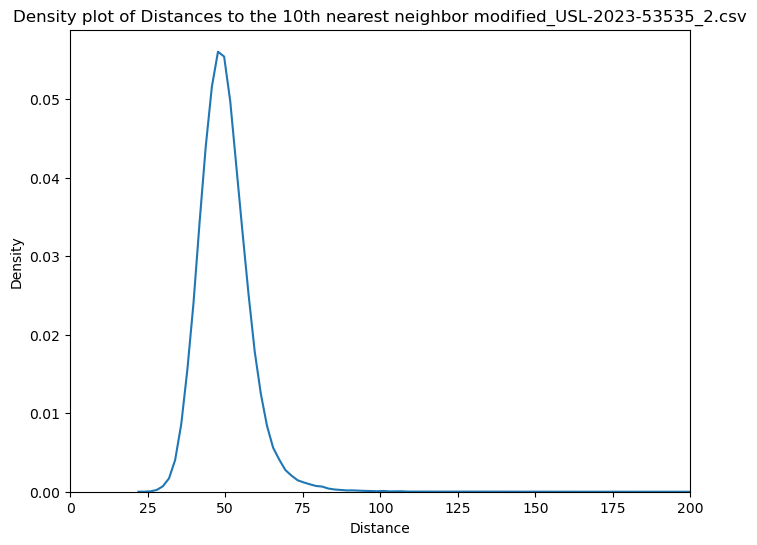

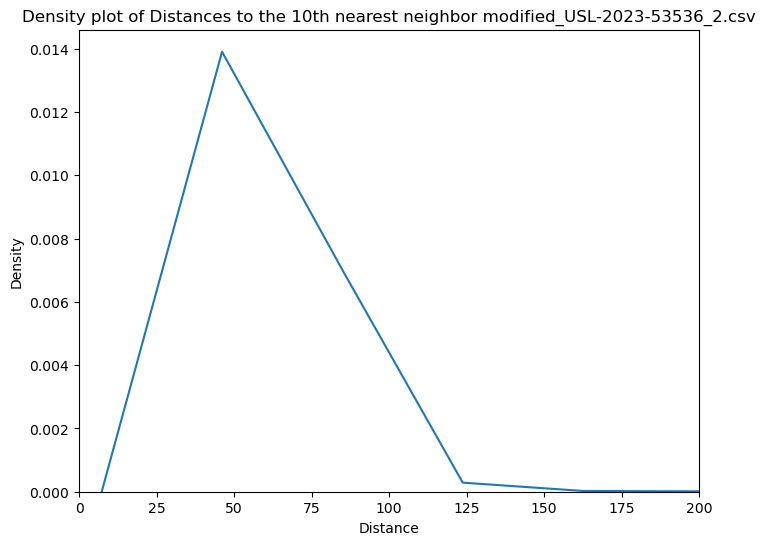

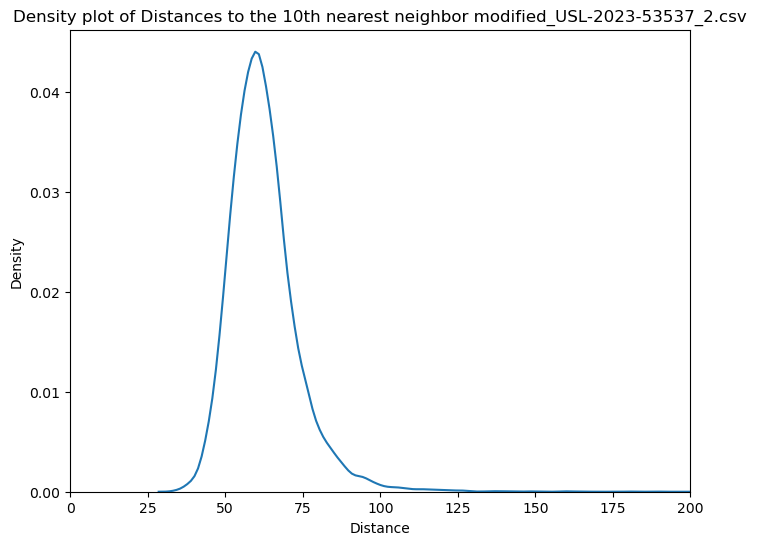

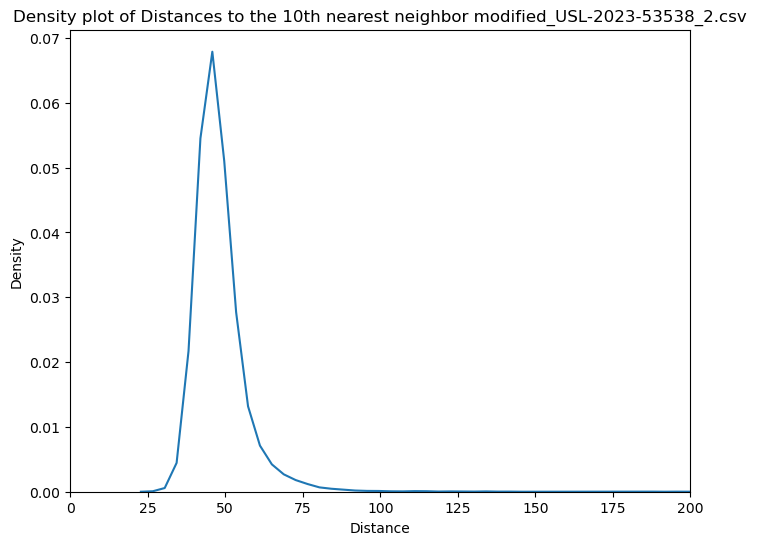

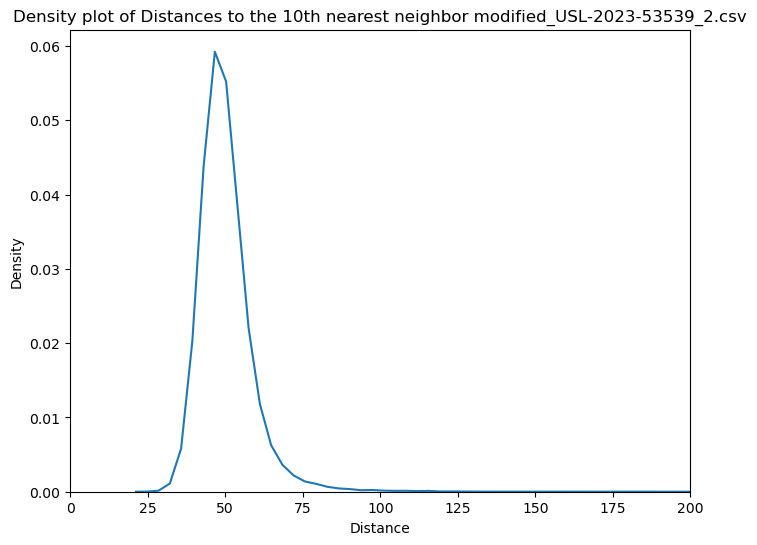

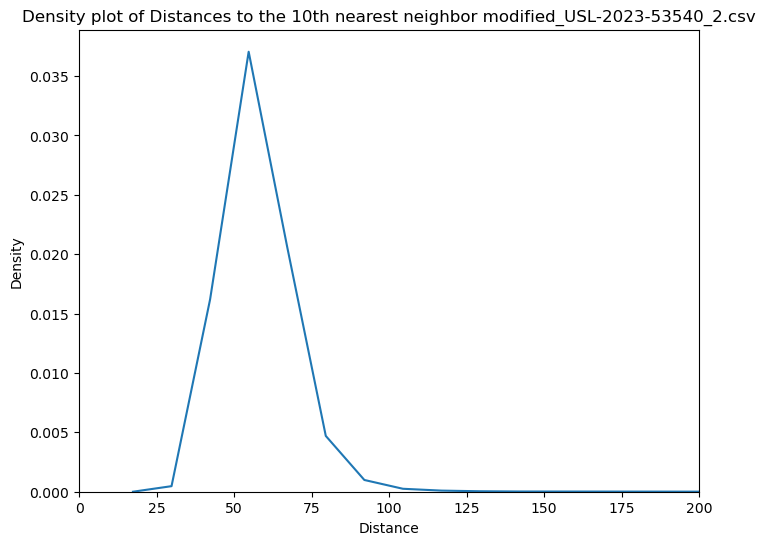

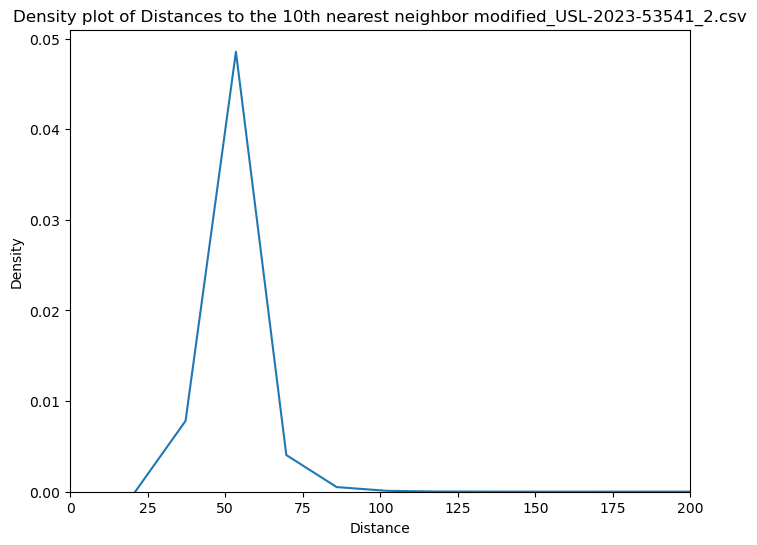

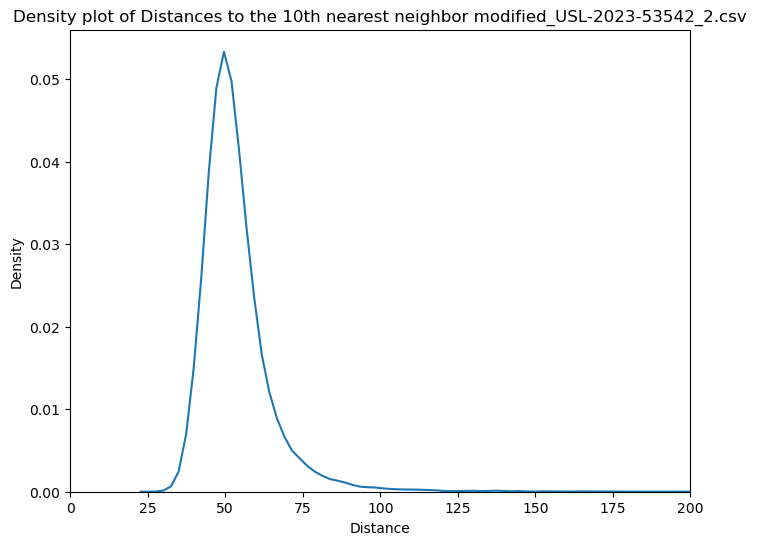

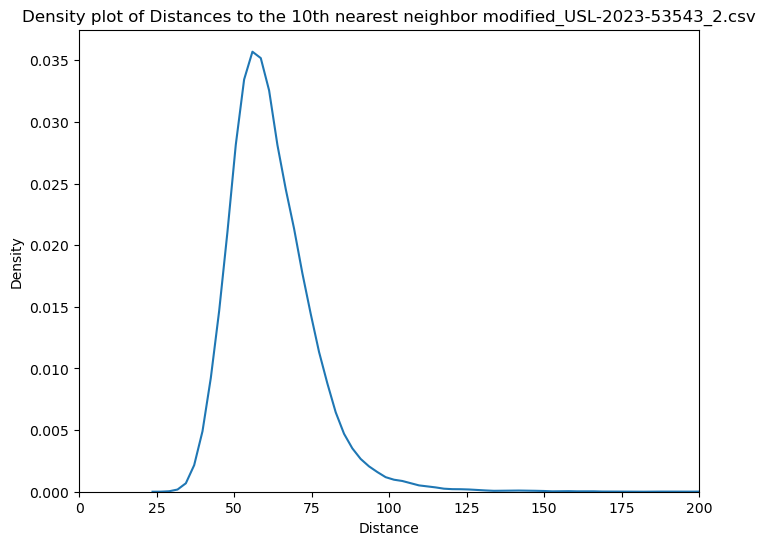

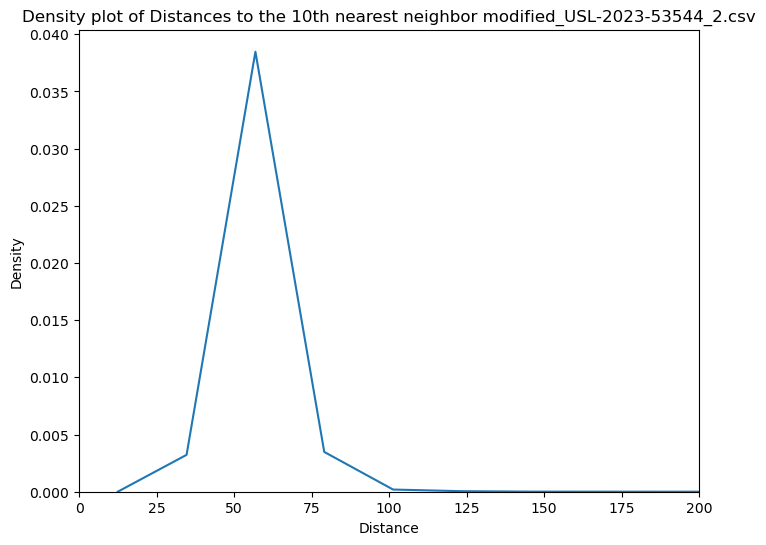

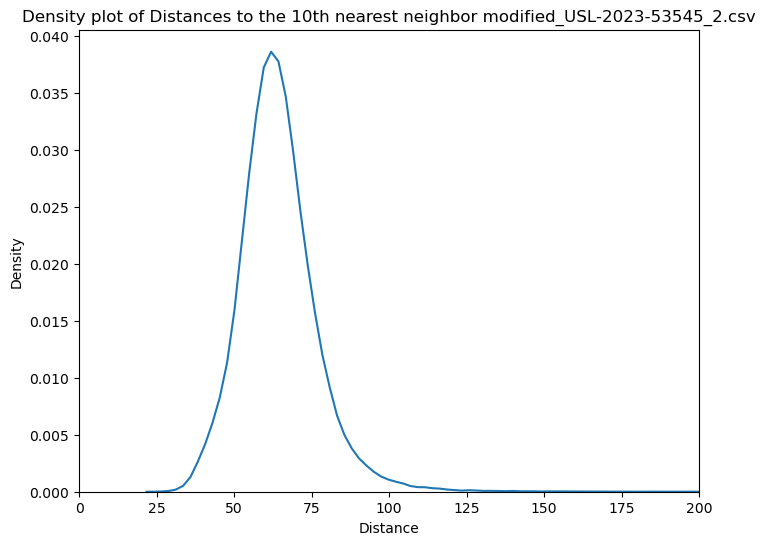

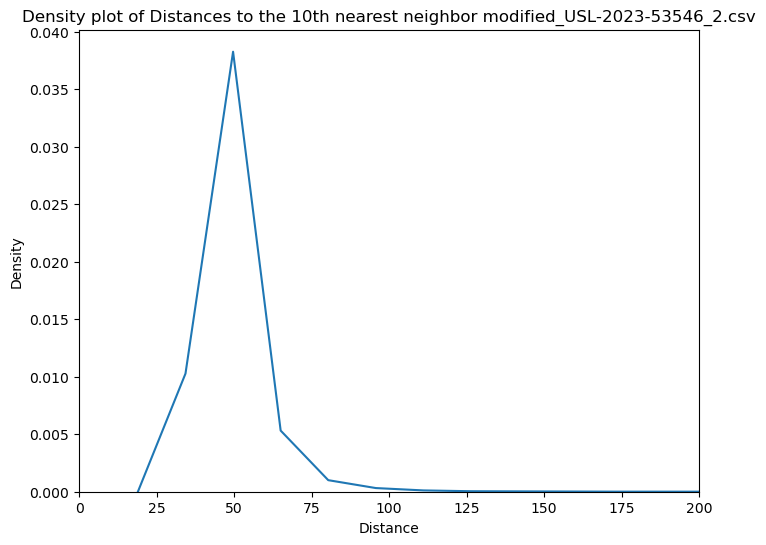

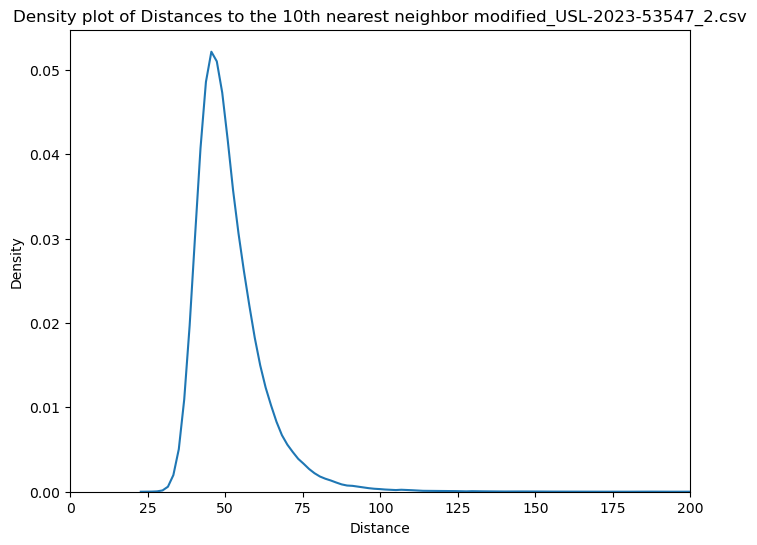

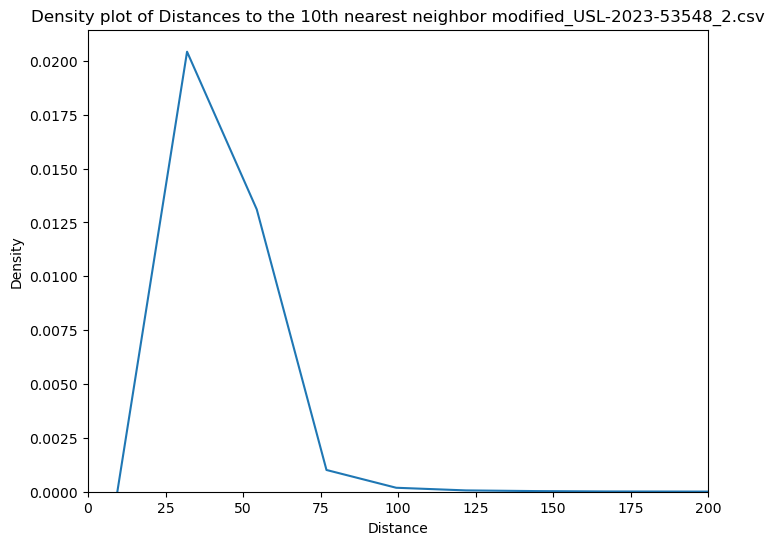

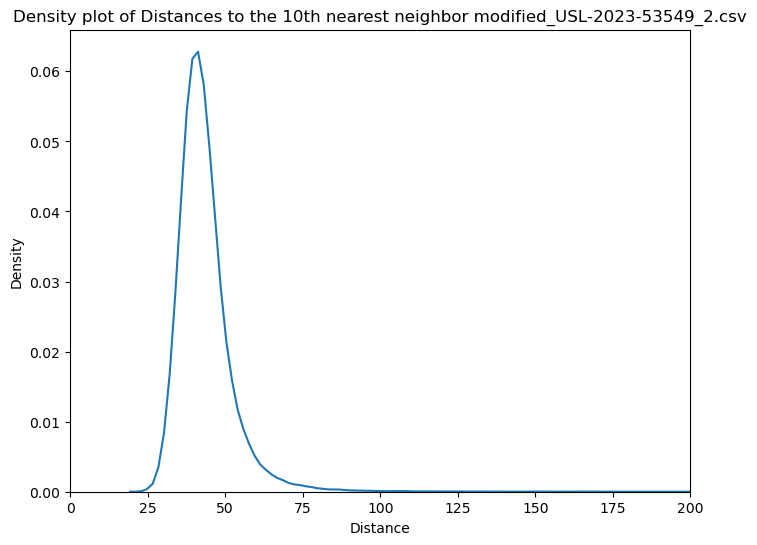

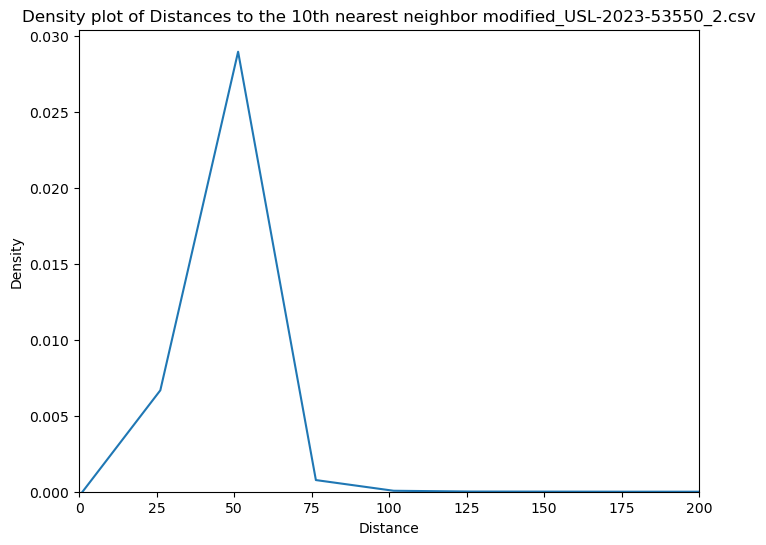

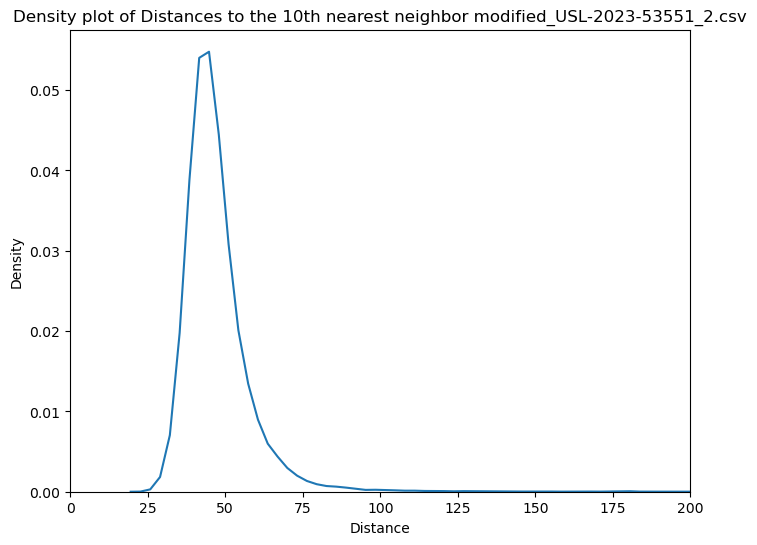

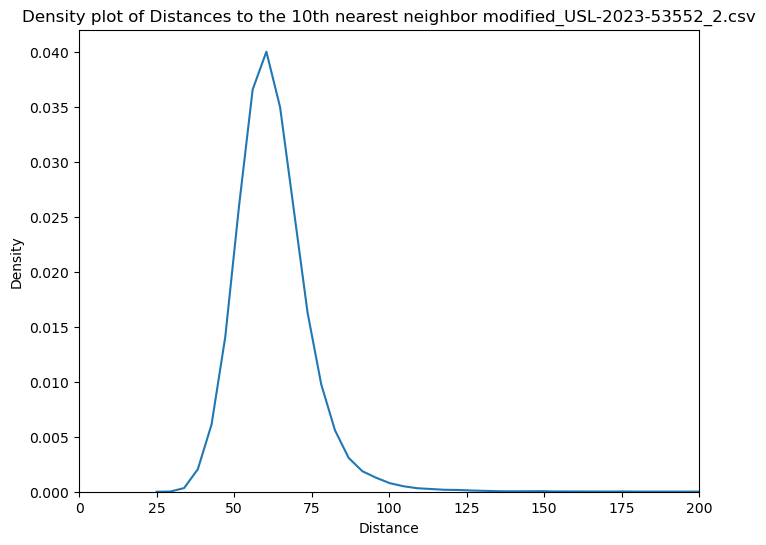

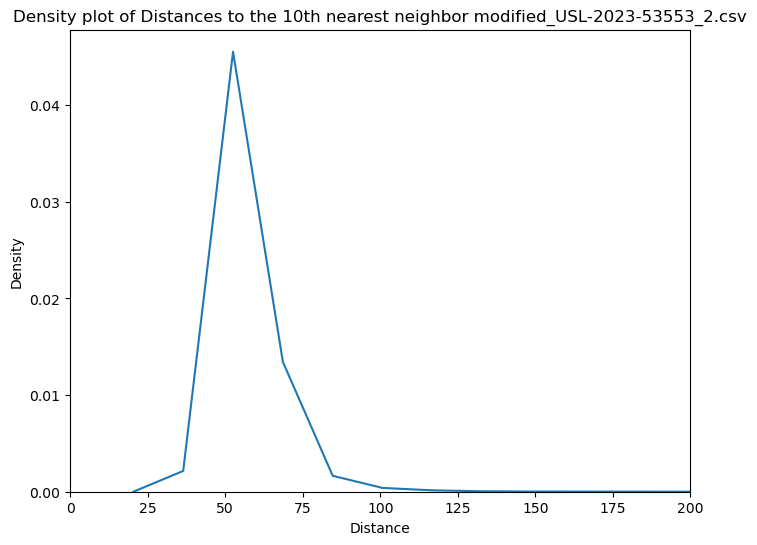

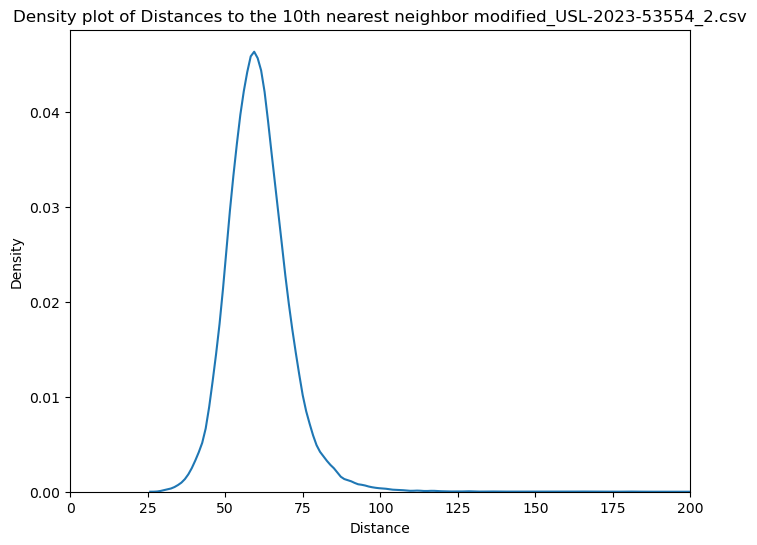

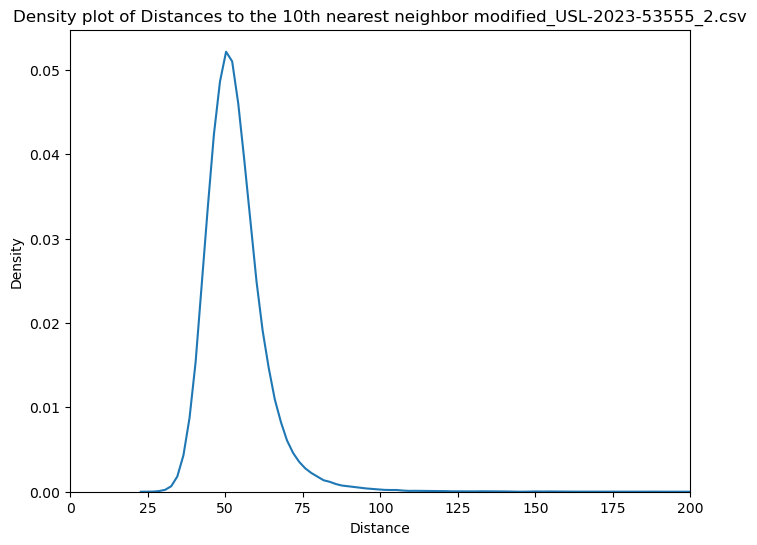

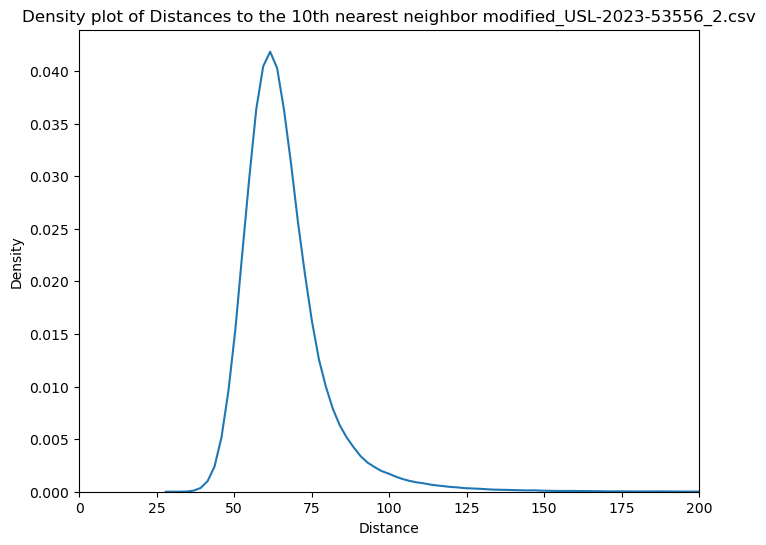

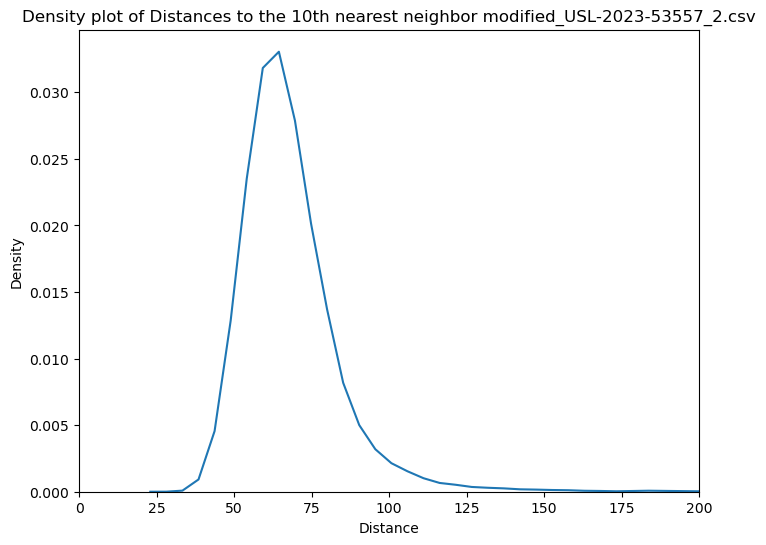

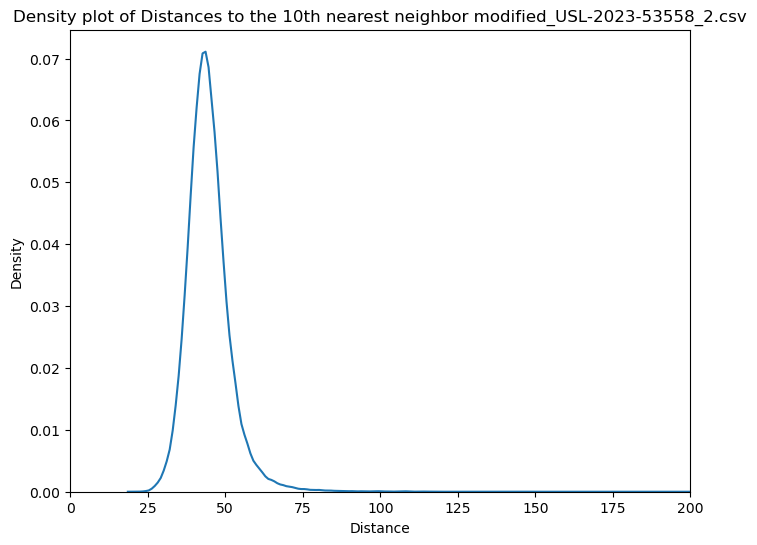

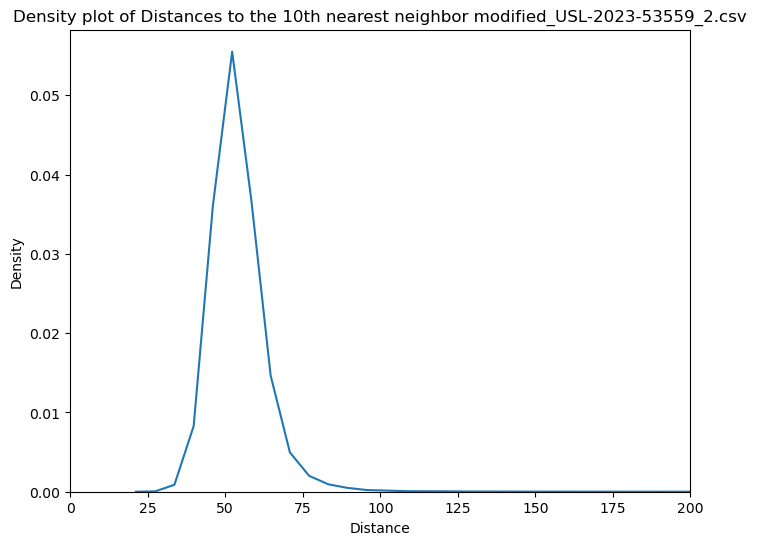

In [26]:
for filename, distances in distances_dict.items():
    plt.figure(figsize=(8,6))
    sns.kdeplot(distances, label=filename)
    plt.xlim(0,200)
    plt.title(f'Density plot of Distances to the 10th nearest neighbor {filename}')
    plt.xlabel("Distance")
    plt.ylabel("Density")
    plt.show()